<a href="https://colab.research.google.com/github/Rayhanfr28/Praktikum-Data-Mining-Post-Test2/blob/main/Salinan_dari_Posttest_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (1) Apriori

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

In [ ]:
#menginstall library pandas, numpy, dan apyori
!pip install pandas
!pip install numpy
!pip install apyori

#mengimport pandas, numpy, dan apyori
import pandas as pd
import numpy as np
from apyori import apriori


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5976 sha256=508b97eb4ca642a5bda4f26f2fa86f9e4ce021c315e25acbd6525fdeb8f001a9
  Stored in directory: /root/.cache/pip/wheels/32/2a/54/10c595515f385f3726642b10c60bf788029e8f3a1323e3913a
Successfully built apyori


In [ ]:
#memanggil/mengimoprt set data
df = pd.read_csv("dataset_market_basket.csv")
df

,whole milk,pastry,salty snack
sausage,whole milk,semi-finished bread,yogurt
soda,pickled vegetables,NaN,NaN
canned beer,misc. beverages,NaN,NaN
sausage,hygiene articles,NaN,NaN
sausage,whole milk,rolls/buns,NaN
whole milk,soda,NaN,NaN
frankfurter,soda,whipped/sour cream,NaN
frankfurter,curd,NaN,NaN
beef,white bread,NaN,NaN
butter,whole milk,NaN,NaN


In [ ]:
#melihat nama-nama kolom
df.columns

Index(['whole milk', 'pastry', 'salty snack'], dtype='object')

In [74]:
# menghitung value pada masing kolom
df.sum() 

CreditScore          6.505288e+06
Age                  3.892180e+05
Tenure               5.012800e+04
Balance              7.648589e+08
NumOfProducts        1.530200e+04
HasCrCard            7.055000e+03
IsActiveMember       5.151000e+03
EstimatedSalary      1.000902e+09
Exited               2.037000e+03
Geography_France     5.014000e+03
Geography_Germany    2.509000e+03
Geography_Spain      2.477000e+03
Gender_Female        4.543000e+03
Gender_Male          5.457000e+03
dtype: float64

In [ ]:
#membuat kombinasi 2 data
from itertools import permutations
rules = list(permutations(df.columns, 2))
rules

[('whole milk', 'pastry'),
 ('whole milk', 'salty snack'),
 ('pastry', 'whole milk'),
 ('pastry', 'salty snack'),
 ('salty snack', 'whole milk'),
 ('salty snack', 'pastry')]

In [ ]:
# untuk menyimpan kombinasi data dalam bentuk list
new_rule = []
for rule in rules: # perulangan untuk menentukan keadaan dari kombinasi data
  if len(df[(df[rule[0]]== 1) & (df[rule[1]] == 1)]) > 0:
    new_rule.append(rule)
  new_rule


In [ ]:
hitung = {} #mengganti dictionary
for rule in new_rule:
  banyak_data= len(df[
      (df[rule[0]]==1) & (df[rule[1]]==1)
      ])
  hitung[str(rule)] = banyak_data

hitung


{}

In [ ]:
#melihat panjang df
len(df)

18

In [ ]:
#menghitung dan menampilkan support dari setiap itemset pada dataset
supp = [i/len(df)*100 for i in hitung.values()]
print(supp)
for item,support in hitung.items():
  print(f"{item} support = {round(support/len(df)*100)}%")

[]


In [ ]:
#menghitung nilai confidence dari setiap aturan asosiasi yang terbentuk
for item,ab in hitung.items():
  i = eval(item)
  print(f"{i[0]}->{i[1]} Confidence = {ab/df[i[0]].sum()*100}%")

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

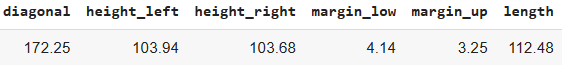
<!-- 1412 -->

In [ ]:
df = pd.read_csv('deteksi_uang_palsu.csv')
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


In [ ]:
# 1. Tambahkan kolom jarak untuk menampilkan jarak dari dataset terhadap target prediksi

import math
import pandas as pd

data = {
    'is_genuine': ['TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE'],
    'diagonal': [172.06, 171.66, 172.23, 172.07, 171.79, 172.0, 171.56, 171.9, 171.84, 172.11],
    'height_left': [104.24, 103.68, 104.0, 104.21, 104.57, 104.23, 104.03, 104.33, 104.06, 104.14],
    'height_right': [103.66, 103.41, 103.35, 103.82, 104.04, 104.52, 103.93, 104.4, 104.1, 104.15],
    'margin_low': [4.24, 4.35, 4.43, 4.29, 4.26, 5.76, 5.47, 4.7, 4.87, 4.84],
    'margin_up': [3.1, 3.33, 2.95, 3.35, 3.15, 3.37, 3.5, 3.31, 3.25, 3.28],
    'length': [113.02, 113.74, 113.12, 113.3, 113.46, 110.94, 111.67, 112.12, 111.04, 110.98]
}

target = [172.25, 103.94, 103.68, 4.14, 3.25, 112.48]

# Menghitung jarak antara setiap data dengan target
jarak = []
for i in range(len(data['is_genuine'])):
    diagonal = data['diagonal'][i] - target[0]
    height_left = data['height_left'][i] - target[1]
    height_right = data['height_right'][i] - target[2]
    margin_low = data['margin_low'][i] - target[3]
    margin_up = data['margin_up'][i] - target[4]
    length = data['length'][i] - target[5]
    jarak.append(math.sqrt(diagonal**2 + height_left**2 + height_right**2 + margin_low**2 + margin_up**2 + length**2))

# Menambahkan kolom jarak pada dataset
data['jarak'] = jarak

# Mengubah dictionary menjadi dataframe
df = pd.DataFrame(data)

# Menampilkan dataframe
print(df)


  is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0       TRUE    172.06       104.24        103.66        4.24       3.10   
1       TRUE    171.66       103.68        103.41        4.35       3.33   
2       TRUE    172.23       104.00        103.35        4.43       2.95   
3       TRUE    172.07       104.21        103.82        4.29       3.35   
4       TRUE    171.79       104.57        104.04        4.26       3.15   
5      FALSE    172.00       104.23        104.52        5.76       3.37   
6      FALSE    171.56       104.03        103.93        5.47       3.50   
7      FALSE    171.90       104.33        104.40        4.70       3.31   
8      FALSE    171.84       104.06        104.10        4.87       3.25   
9      FALSE    172.11       104.14        104.15        4.84       3.28   

   length     jarak  
0  113.02  0.671267  
1  113.74  1.458321  
2  113.12  0.834626  
3  113.30  0.910934  
4  113.46  1.312593  
5  110.94  2.421281  
6  111.67

In [ ]:
# 2. Urutkan data berdasarkan K jarak terdekat (Untuk K nya ambil akar 2 dari banyak data)
# Menghitung K berdasarkan akar dua dari banyak data
K = round(math.sqrt(len(jarak)))

# Membuat DataFrame dari data dan jarak
df = pd.DataFrame(data)
df['jarak'] = jarak

# Mengurutkan DataFrame berdasarkan jarak terdekat dan mengambil K teratas
df_sorted = df.sort_values('jarak').head(K)

# Menampilkan hasil
print(df_sorted)

  is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0       TRUE    172.06       104.24        103.66        4.24       3.10   
2       TRUE    172.23       104.00        103.35        4.43       2.95   
3       TRUE    172.07       104.21        103.82        4.29       3.35   

   length     jarak  
0  113.02  0.671267  
2  113.12  0.834626  
3  113.30  0.910934  


In [ ]:
# 3. Tentukan apa hasil prediksinya berdasarkan label terbanyak

k = round(math.sqrt(len(data['is_genuine'])))
# Membuat list dari indeks data terdekat dengan target
indeks_terdekat = sorted(range(len(jarak)), key=lambda k: jarak[k])[:k]

# Mengambil label dari data yang terdekat
label_terdekat = [data['is_genuine'][i] for i in indeks_terdekat]

# Menghitung label terbanyak
label_prediksi = max(set(label_terdekat), key=label_terdekat.count)

# Menampilkan hasil prediksi
print("Hasil prediksi: ", label_prediksi)



Hasil prediksi:  TRUE


# (3) Analisis

> Nama : Rayhan Fadlur Rahman

> Nim : 2109116055


Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

# **Businis Understanding**

Dataset ini dapat digunakan untuk melatih model machine learning untuk memprediksi churn berdasarkan data pelanggan yang tersedia. Dalam industri telekomunikasi, model ini dapat digunakan untuk mengidentifikasi pelanggan yang berpotensi berhenti menggunakan layanan, sehingga perusahaan dapat mengambil tindakan yang tepat untuk mempertahankan pelanggan tersebut.

# **Data understanding**

In [ ]:
import pandas as pd

df3 = pd.read_csv("Churn Modeling.csv")
df3

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
#menampilkan informasi dari dataset
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# Menampilkan dimensi dari DataFrame
print(df3.shape)

(10000, 14)


In [ ]:
df3.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
#menampilkan semua kolom pada dataset
df3.columns     

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
#melihat nilai kosong pada kolom df3
df3.isna()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#melihat nilai unik pada tiap kolom di database
for col in df3.columns:
    print(col, ":", len(df3[col].unique()), "nilai unik")

RowNumber : 10000 nilai unik
CustomerId : 10000 nilai unik
Surname : 2932 nilai unik
CreditScore : 460 nilai unik
Geography : 3 nilai unik
Gender : 2 nilai unik
Age : 70 nilai unik
Tenure : 11 nilai unik
Balance : 6382 nilai unik
NumOfProducts : 4 nilai unik
HasCrCard : 2 nilai unik
IsActiveMember : 2 nilai unik
EstimatedSalary : 9999 nilai unik
Exited : 2 nilai unik


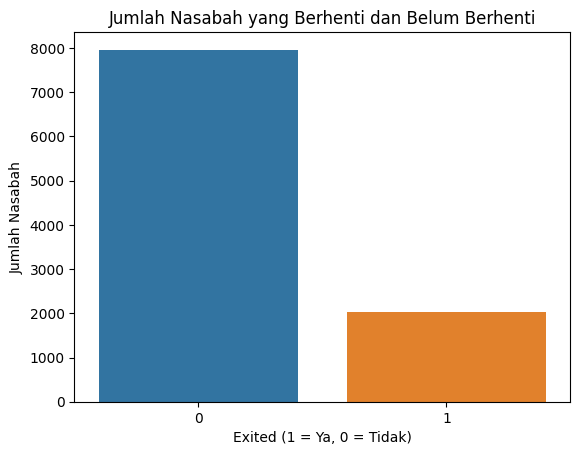

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("Churn Modeling.csv")

# Membuat countplot
sns.countplot(data=df, x="Exited")

# Menambahkan judul dan label pada sumbu x dan y
plt.title("Jumlah Nasabah yang Berhenti dan Belum Berhenti")
plt.xlabel("Exited (1 = Ya, 0 = Tidak)")
plt.ylabel("Jumlah Nasabah")

# Menampilkan plot
plt.show()


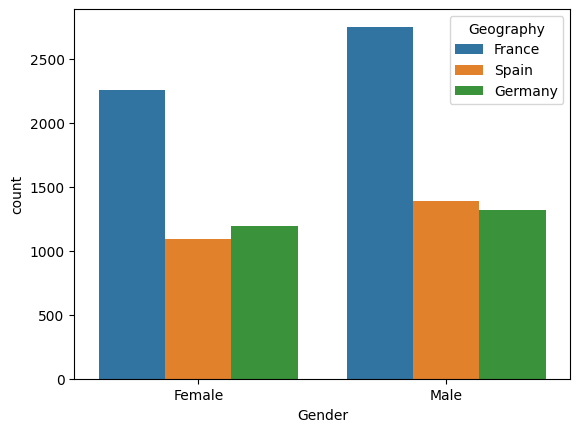

In [ ]:
# Membuat visualisasi
sns.countplot(data=df, x='Gender', hue='Geography')

# Menampilkan visualisasi
plt.show()

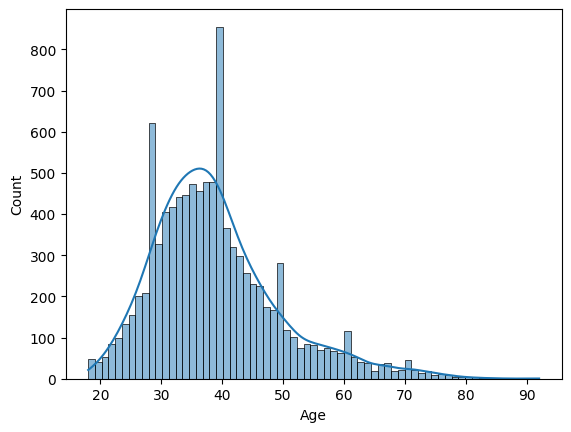

In [ ]:
# Membuat histogram umur pelanggan
sns.histplot(data=df, x="Age", kde=True)

# Menampilkan histogram
plt.show()

# **DATA PREPARATION**

In [70]:
df3.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
#liat data duplicate
df3.duplicated().sum()

0

In [71]:
# Melakukan encoding pada data kategori
df_encoded = pd.get_dummies(df)

# Menampilkan 5 baris pertama dataset yang sudah di-encoding
print(df_encoded.head())

   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0               1        101348.88       1                 1   
1               1        112542.58       0                 0   
2               0        113931.57       1                 1   
3               0         93826.63       0                 1   
4               1         79084.10       0                 0   

   Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  
0                  0                0              1            0  
1                  0                1              1            0  
2 

In [72]:
# Import library yang dibutuhkan
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("Churn Modeling.csv")

# Drop kolom yang tidak diperlukan
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

# Encoding kolom-kolom kategorikal
df = pd.get_dummies(df, columns=['Geography', 'Gender'])

# Split dataset menjadi training dan testing set
X = df.drop(columns=['Exited'])
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [73]:
# Melihat 5 baris pertama dari dataset yang telah dipreparasi
print(df.head())

   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0               1        101348.88       1                 1   
1               1        112542.58       0                 0   
2               0        113931.57       1                 1   
3               0         93826.63       0                 1   
4               1         79084.10       0                 0   

   Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  
0                  0                0              1            0  
1                  0                1              1            0  
2 